In [517]:
import pandas as pd
plt.style.use('tableau-colorblind10')

In [518]:
df = pd.read_csv("raw-census-tracts-dataset_clean.csv")
df = df.drop(columns=["Unnamed: 0.1","Unnamed: 0"], axis=1)
df.head()

,POPULATION,POPULATION_DENSITY,RURAL_POPULATION_PERCENTAGE,RURAL_POPULATION_DENSITY,MALE_FEMALE_RATIO,WHITE_ALONE,BLACK_ALONE,AMERICAN_INDIAN_ALASKA_NATIVE_ALONE,ASIAN_ALONE,NATIVE_HAWAIIAN_PACIFIC_ISLANDER_ALONE,...,MEDIAN_INCOME,POVERTY_RATE,DEMOCRAT_PERCENTAGE,REPUBLICAN_PERCENTAGE,OBESITY_RATE,SMOKING_RATE,DRUG_OVERDOSE_DEATH_RATE,PRECIPITATION,TOTAL_ACCIDENTS,DRUNK_DRIVING_PERCENTAGE
0,0.001629,188.536533,0.032291,7.990649,104.895000,60.739427,14.807821,2.460794,8.819452,0.010000,...,32463.914002,1.701977,54.887154,28.972410,39.727870,14.673271,99.900000,38.537022,13.603062,9.027207
1,0.004568,0.100000,0.011869,56.230687,97.858856,98.436834,0.010000,1.580469,66.618515,0.097852,...,47608.501369,3.581751,32.796780,33.609767,46.973692,14.229877,6.965160,88.651651,50.464376,26.229567
2,0.800408,999.000000,0.020898,36.496362,104.895000,74.624715,0.010000,0.010000,4.170625,0.424334,...,56322.183175,2.651653,37.715517,37.275346,43.374924,9.100637,31.960733,43.010389,12.010000,15.838133
3,2.822161,510.634838,17.065325,99.957909,101.611398,64.416833,3.554620,0.010000,0.010000,1.432343,...,28074.760879,2.577355,34.461998,39.989110,38.251403,11.956131,99.900000,50.250622,29.090148,11.268868
4,5.042789,0.100000,0.034675,5.877269,99.690018,80.366648,6.901976,1.685286,0.116342,0.720658,...,41707.121227,2.275618,45.124522,30.088506,38.331628,9.132512,5.975314,97.429530,18.845805,29.343376


In [665]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df.drop(['DRUNK_DRIVING_PERCENTAGE'], axis=1)
y = df['DRUNK_DRIVING_PERCENTAGE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
error = y_test - y_pred
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

Mean Squared Error: 50.7639777259023
R-squared score: 0.3143323001672724


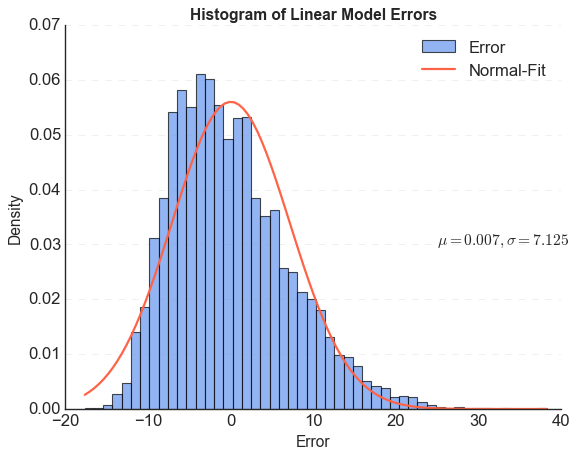

In [520]:
from scipy.stats import norm
import matplotlib.pyplot as plt

# Compute mean and standard deviation of the errors
mean_error = np.mean(error)
std_error = np.std(error)

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram of errors
ax.hist(error, density=True, alpha=0.7, color='#6495ED', label='Error', bins=50)

# Overlay the normal distribution PDF
x = np.linspace(np.min(error), np.max(error), 100)
y = norm.pdf(x, loc=mean_error, scale=std_error)
ax.plot(x, y, label='Normal-Fit', linewidth=2, color='#FF6347')

# Set axis labels and title
ax.set_xlabel('Error', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.set_title('Histogram of Linear Model Errors', fontsize=14, fontweight='bold')

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add legend
ax.legend(fontsize=15)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust tick parameters
ax.tick_params(axis='both', which='both', labelsize=15, length=0)
ax.text(25, 0.03, r"$\mu = %.3f, \sigma = %.3f$"%(mean_error, std_error), fontsize=14)
# Save the figure
plt.savefig('pic/1.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

An R-squared score of 0.2988 means that the linear regression model explains about 30% of the variation in the target variable, percentage of drunk driving accidents. While this is not a very high value, it is still better than randomly guessing the target variable. However, it also suggests that there may be other important factors that are not included in the current set of predictor variables that could improve the performance of the model. In general, an R-squared score of 0.3 is considered to be a weak fit, but it can still provide some useful insights into the relationship between the predictor variables and the target variable.

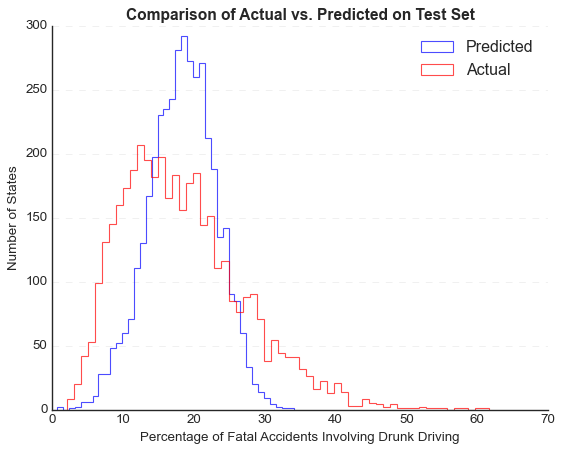

Correlation coefficient: 0.5607623091108129


In [524]:
import numpy as np
import matplotlib.pyplot as plt

# Make a histogram of the predicted drunk driving percentages
plt.hist(y_pred, bins=40, alpha=0.7, color='blue',histtype="step", label='Predicted')
plt.hist(y_test, bins=60, alpha=0.7, color='red',histtype="step", label='Actual')

# Set axis labels and title
plt.xlabel('Percentage of Fatal Accidents Involving Drunk Driving')
plt.ylabel('Number of States')
plt.title('Comparison of Actual vs. Predicted on Test Set',fontsize=14, fontweight='bold')

# Add legend
plt.legend(loc='upper right')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Save the figure
plt.savefig('pic/2.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Compute the correlation coefficient between the predicted and actual values
corr_coef = np.corrcoef(y_test, y_pred)[0, 1]
print('Correlation coefficient:', corr_coef)

A correlation coefficient of 0.56076 indicates a moderate positive correlation between the predictor variables and the target variable, percentage of drunk driving accidents. This means that as the predictor variables increase, the target variable also tends to increase, but the relationship is not very strong. A correlation coefficient of 1 indicates a perfect positive correlation, while a value of 0 indicates no correlation and a value of -1 indicates a perfect negative correlation.

In [412]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

lasso = Lasso()

ridge = Ridge()

lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

ridge_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 150, 250, 500]}

lasso_cv = GridSearchCV(lasso, lasso_param_grid, cv=5)
lasso_cv.fit(X_train, y_train)

ridge_cv = GridSearchCV(ridge, ridge_param_grid, cv=5)
ridge_cv.fit(X_train, y_train)

print('Lasso - Best alpha:', lasso_cv.best_params_['alpha'])
print('Lasso - R2:', lasso_cv.best_score_)

print('Ridge - Best alpha:', ridge_cv.best_params_['alpha'])
print('Ridge - R2:', ridge_cv.best_score_)

Lasso - Best alpha: 0.01
Lasso - R2: 0.2922448553637321
Ridge - Best alpha: 100
Ridge - R2: 0.29223191903476897


In [417]:
y_pred = lasso_cv.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred)

mse_lasso

50.763568958162345

In [418]:
y_pred = ridge_cv.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred)

mse_ridge

50.76325005143106

In [666]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor(n_estimators=300, random_state=42, max_depth = 20, min_samples_split = 2)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random forest MSE:', mse_rf)

Random forest MSE: 46.293943263513356


In [432]:
y_test.shape

torch.Size([4000, 1])

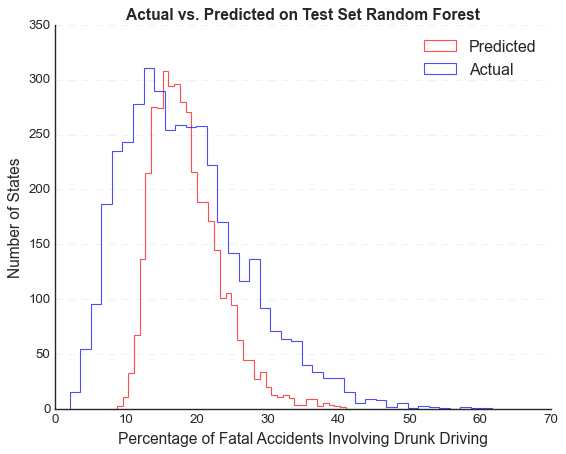

Correlation coefficient: 0.6157234943427137


In [530]:
# Make a histogram of the predicted drunk driving percentages
# Make a histogram of the predicted drunk driving percentages
plt.hist(y_pred_rf, bins=40, alpha=0.7, color='red',histtype="step", label='Predicted')
plt.hist(y_test, bins=40, alpha=0.7, color='blue', histtype="step",label='Actual')

# Set axis labels and title
plt.xlabel('Percentage of Fatal Accidents Involving Drunk Driving',fontsize=14)
plt.ylabel('Number of States',fontsize=14)
plt.title('Actual vs. Predicted on Test Set Random Forest',fontsize=14, fontweight='bold')

# Add legend
plt.legend(loc='upper right')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Save the figure
plt.savefig('pic/3.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Compute the correlation coefficient between the predicted and actual values
corr_coef = np.corrcoef(y_test, y_pred_rf)[0, 1]
print('Correlation coefficient:', corr_coef)

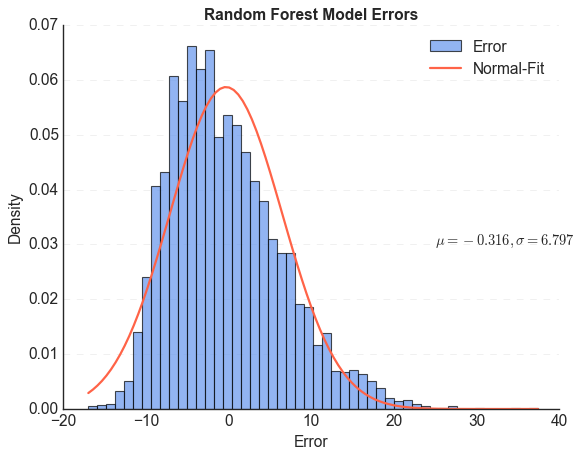

In [667]:
error = y_test - y_pred_rf
# Compute mean and standard deviation of the errors
mean_error = np.mean(error)
std_error = np.std(error)

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram of errors
ax.hist(error, density=True, alpha=0.7, color='#6495ED', label='Error', bins=50)

# Overlay the normal distribution PDF
x = np.linspace(np.min(error), np.max(error), 100)
y = norm.pdf(x, loc=mean_error, scale=std_error)
ax.plot(x, y, label='Normal-Fit', linewidth=2, color='#FF6347')

# Set axis labels and title
ax.set_xlabel('Error', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.set_title('Random Forest Model Errors', fontsize=14, fontweight='bold')

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add legend
ax.legend(fontsize=14)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust tick parameters
ax.tick_params(axis='both', which='both', labelsize=14, length=0)
ax.text(25, 0.03, r"$\mu = %.3f, \sigma = %.3f$"%(mean_error, std_error),fontsize=13)
# Save the figure
plt.savefig('pic/4.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [437]:
model_rf = RandomForestRegressor(n_estimators=200, random_state=123)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random forest MSE:', mse_rf)

Random forest MSE: 46.51896262806983


In [375]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20]
}

# Create a Random Forest Regressor model
model_rf = RandomForestRegressor(random_state=42)

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model_rf = grid_search.best_estimator_
best_params_rf = grid_search.best_params_

# Print the best parameters found
print('Best Parameters:', best_params_rf)

# Make predictions using the best model
y_pred_rf = best_model_rf.predict(X_test)

# Compute the mean squared error using the best model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random Forest MSE:', mse_rf)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest MSE: 46.293943263513356


# NN

In [1031]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [1032]:
X = df.drop(['DRUNK_DRIVING_PERCENTAGE'], axis=1)
y = df['DRUNK_DRIVING_PERCENTAGE']

In [1033]:
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [263]:
X.shape

torch.Size([20000, 22])

In [264]:
y.shape

torch.Size([20000, 1])

In [1034]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=415)

In [1035]:
loader = DataLoader(list(zip(X,y)), shuffle=True, batch_size=100)

In [1036]:
class NeuralNet(nn.Module):
    def __init__(self, input_size = 22, hidden_size = 64, num_classes = 1):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        return out

In [1037]:
torch.manual_seed(123)
model = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
losses = []
test_losses = []
for epoch in range(50):
    #for X_batch, y_batch in loader:
    optimizer.zero_grad()

    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    with torch.no_grad():
            y_pred_test = model(X_test)
            test_mse = criterion(y_pred_test, y_test)
            test_losses.append(test_mse)

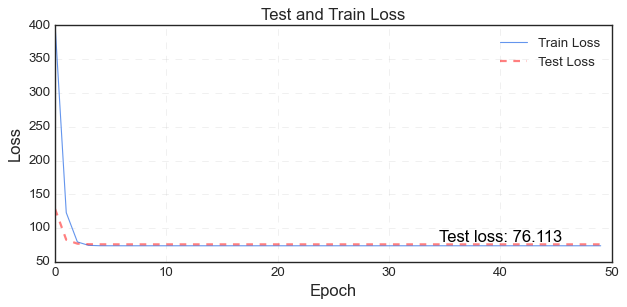

In [919]:
import matplotlib.pyplot as plt

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the losses
ax.plot(losses, color='#6495ED', linewidth=1, linestyle='-', label='Train Loss')
ax.plot(test_losses, color='red', linewidth=2, alpha=0.5, linestyle='--', label='Test Loss')

# Add labels and title
ax.set_xlabel('Epoch', fontsize=15)
ax.set_ylabel('Loss', fontsize=15)
ax.set_title('Test and Train Loss', fontsize=15)

ax.grid(True, linestyle='--', alpha=0.5)

# Add final loss value as text
ax.text(40, 76, 'Test loss: 76.113', ha='center', va='bottom', color='black', fontsize=15)

# Add legend
ax.legend(fontsize=12)

# Adjust the plot layout
plt.tight_layout()

# Save the plot as an image
plt.savefig('pic/5.png', dpi=300, bbox_inches='tight')

In [485]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [270]:
class NeuralNet_2(nn.Module):
    def __init__(self, input_size=22, hidden_size=128, out_dim=1):
        super(NeuralNet_2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, out_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        return out

In [271]:
torch.manual_seed(123)
model = NeuralNet_2()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=3e-4)

for epoch in range(10000):
    optimizer.zero_grad()

    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
print(loss.item())

74.52306365966797


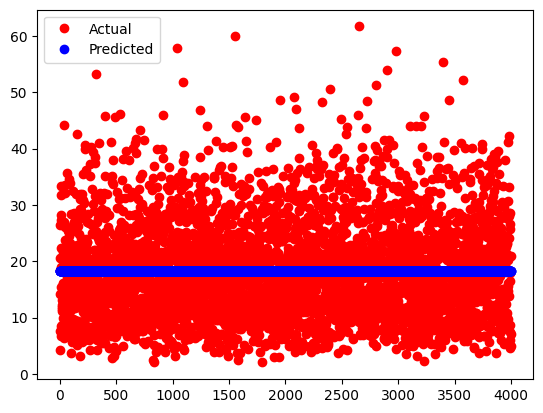

In [272]:
predicted = model(X_test).detach().numpy()

plt.plot(y_test, 'ro', label='Actual')
plt.plot(predicted, 'bo', label='Predicted')
plt.legend()
plt.show()

In [273]:
mse = mean_squared_error(y_test, predicted)
mse

74.03605

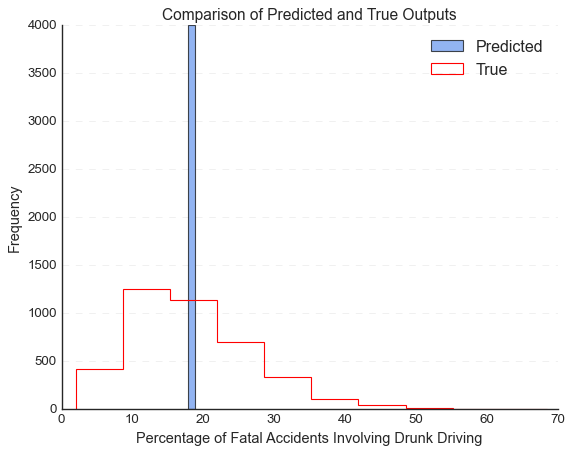

In [1038]:
import matplotlib.pyplot as plt

# Get predicted outputs
outputs = model(X_test).detach().numpy()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histograms of predicted and true outputs
ax.hist(outputs, bins=1, alpha=0.7, color='#6495ED',label='Predicted')
ax.hist(y_test.numpy(), bins=10, color='red', histtype="step",label='True')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)
# Add labels and title
ax.set_xlabel('Percentage of Fatal Accidents Involving Drunk Driving', fontsize=13)
ax.set_ylabel('Frequency', fontsize=13)
ax.set_title('Comparison of Predicted and True Outputs', fontsize=14)

# Add legend
ax.legend()
plt.savefig('pic/6.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [920]:
class NeuralNet_3(nn.Module):
    def __init__(self, input_size=22, hidden_size=128, out_dim=1):
        super(NeuralNet_3, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.norm = nn.BatchNorm1d(hidden_size)
        self.ReLU = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, out_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.norm(out)
        out = self.ReLU(out)
        out = self.fc2(out)
        return out

In [1109]:
X = df.drop(['DRUNK_DRIVING_PERCENTAGE'], axis=1)
y = df['DRUNK_DRIVING_PERCENTAGE']

X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

torch.manual_seed(123)
model = NeuralNet_3()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=3e-4)

losses = []
testlosses = []
for epoch in range(15000):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch%20 ==0):
        with torch.no_grad():
            losses.append(loss.item())
            y_pred_test = model(X_test)
            test_mse = criterion(y_pred_test, y_test)
            testlosses.append(test_mse)

In [1110]:
loss.item()

39.422054290771484

In [1045]:
test_mse.item() 

42.413063049316406

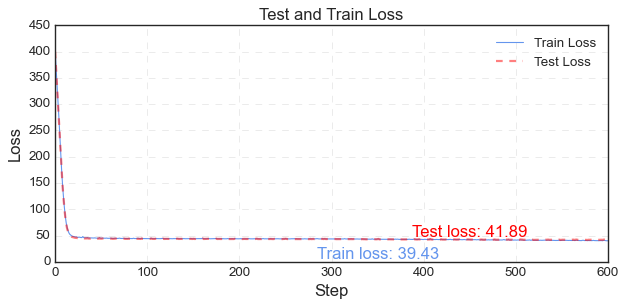

In [1111]:
# Set the figure size
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the losses
ax.plot(losses, color='#6495ED', linewidth=1, linestyle='-', label='Train Loss')
ax.plot(testlosses, color='red', linewidth=2, alpha=0.5, linestyle='--', label='Test Loss')

# Add labels and title
ax.set_xlabel('Step', fontsize=15)
ax.set_ylabel('Loss', fontsize=15)
ax.set_title('Test and Train Loss', fontsize=15)
ax.set_xlim(0, 600)
ax.grid(True, linestyle='--', alpha=0.7)

# Add final loss value as text
ax.text(450, 42, 'Test loss: 41.89', ha='center', va='bottom', color='red', fontsize=15)
ax.text(350, 1, 'Train loss: 39.43', ha='center', va='bottom', color='#6495ED', fontsize=15)

# Adjust the plot layout
plt.tight_layout()

ax.legend(fontsize=12)

# Save the plot as an image
plt.savefig('pic/7.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


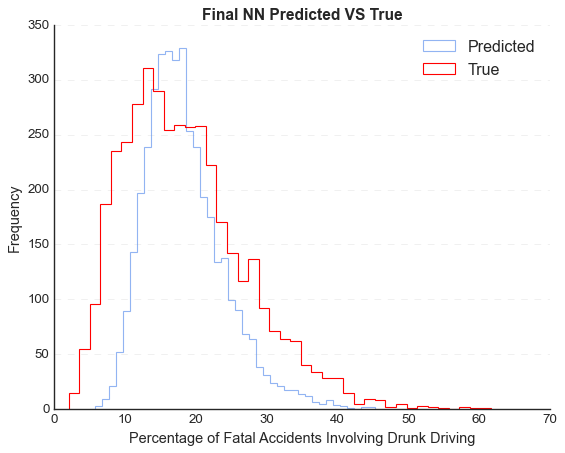

In [1047]:
import matplotlib.pyplot as plt

# Get predicted outputs


# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histograms of predicted and true outputs
ax.hist(y_pred_test.detach().numpy(), bins=40, alpha=0.7, color='#6495ED',histtype="step",label='Predicted')
ax.hist(y_test.reshape(-1), bins=40, color='red', histtype="step",label='True')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)
# Add labels and title
ax.set_xlabel('Percentage of Fatal Accidents Involving Drunk Driving', fontsize=13)
ax.set_ylabel('Frequency', fontsize=13)
ax.set_title('Final NN Predicted VS True',fontweight='bold', fontsize=14)

# Add legend
ax.legend()
plt.savefig('pic/8.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

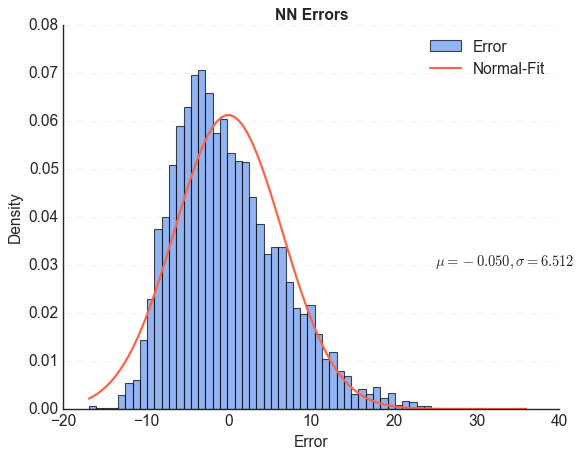

In [1029]:
error = y_test.numpy() - y_pred_test.numpy()
# Compute mean and standard deviation of the errors
mean_error = np.mean(error)
std_error = np.std(error)

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram of errors
ax.hist(error, density=True, alpha=0.7, color='#6495ED', label='Error', bins=60)

# Overlay the normal distribution PDF
x = np.linspace(np.min(error), np.max(error), 100)
y = norm.pdf(x, loc=mean_error, scale=std_error)
ax.plot(x, y, label='Normal-Fit', linewidth=2, color='#FF6347')

# Set axis labels and title
ax.set_xlabel('Error', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.set_title('NN Errors', fontsize=14, fontweight='bold')

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add legend
ax.legend(fontsize=14)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust tick parameters
ax.tick_params(axis='both', which='both', labelsize=14, length=0)
ax.text(25, 0.03, r"$\mu = %.3f, \sigma = %.3f$"%(mean_error, std_error),fontsize=13)
# Save the figure
plt.savefig('pic/9.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [796]:
class NeuralNet_4(nn.Module):
    def __init__(self, input_size=22, hidden_size=64, out_dim=1):
        super(NeuralNet_4, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.norm1 = nn.BatchNorm1d(64)
        self.ReLU = nn.ReLU()
        self.fc2 = nn.Linear(64, 128)
        self.norm2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, out_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.norm1(out)
        out = self.ReLU(out)
        out = self.fc2(out)
        out = self.norm2(out)
        out = self.ReLU(out)
        out = self.fc3(out)
        out = self.norm1(out)
        out = self.ReLU(out)
        out = self.fc4(out)
        return out

In [806]:
torch.manual_seed(123)
model = NeuralNet_4()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=3e-4)

losses = []
testlosses = []
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch%10 ==0):
        with torch.no_grad():
            losses.append(loss.item())
            y_pred_test = model(X_test)
            test_mse = criterion(y_pred_test, y_test)
            testlosses.append(test_mse)

In [807]:
test_mse

tensor(47.0667)

In [808]:
loss

tensor(37.4646, grad_fn=<MseLossBackward0>)

In [771]:
a1 = np.array(y_test).reshape(-1)
a1.shape

(4000,)

In [773]:
a2 = np.array(outputs.detach().numpy()).reshape(-1)

In [774]:
corr_coef = np.corrcoef(a1, a2)[0, 1]
corr_coef

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4000 and the array at index 1 has size 16000

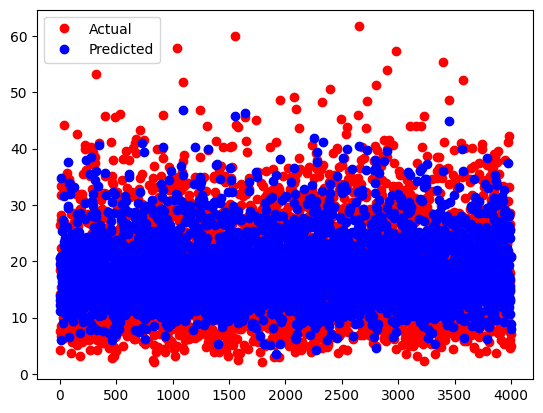

In [401]:
predicted = model(X_test).detach().numpy()

plt.plot(y_test, 'ro', label='Actual')
plt.plot(predicted, 'bo', label='Predicted')
plt.legend()
plt.show()

#  TL

In [956]:
small_df = pd.read_csv("raw_state_data_drunk_driving.csv")
small_df.head(5)

,STATE,STATE_NAME,POPULATION,POPULATION_DENSITY,RURAL_POPULATION_PERCENTAGE,RURAL_POPULATION_DENSITY,MALE_FEMALE_RATIO,WHITE_ALONE,BLACK_ALONE,AMERICAN_INDIAN_ALASKA_NATIVE_ALONE,...,MEDIAN_INCOME,POVERTY_RATE,DEMOCRAT_PERCENTAGE,REPUBLICAN_PERCENTAGE,OBESITY_RATE,SMOKING_RATE,DRUG_OVERDOSE_DEATH_RATE,PRECIPITATION,TOTAL_ACCIDENTS,DRUNK_DRIVING_PERCENTAGE_2
0,1,Alabama,5.07,99.52,41.0,40.4,93.6,69.1,26.8,0.7,...,48608.0,14.5,35.0,52.0,39.9,15.0,22.3,56.00,852,22.231
1,2,Alaska,0.73,1.28,34.0,0.4,109.2,65.3,3.7,15.6,...,67138.0,11.7,33.0,51.0,33.5,15.0,22.0,29.03,53,28.480
2,4,Arizona,7.36,64.05,10.2,5.8,98.8,82.6,5.2,5.3,...,54301.0,11.2,41.0,41.0,31.3,12.0,35.8,11.80,967,18.330
3,5,Arkansas,3.01,58.16,43.8,25.1,96.4,79.0,15.7,1.0,...,51148.0,15.1,35.0,48.0,38.7,18.0,19.1,49.72,585,26.710
4,6,California,39.03,251.90,5.1,12.7,98.9,71.9,6.5,1.6,...,76386.0,11.0,51.0,31.0,27.6,9.0,21.8,22.97,3558,25.424


In [811]:
df.head(1)

,POPULATION,POPULATION_DENSITY,RURAL_POPULATION_PERCENTAGE,RURAL_POPULATION_DENSITY,MALE_FEMALE_RATIO,WHITE_ALONE,BLACK_ALONE,AMERICAN_INDIAN_ALASKA_NATIVE_ALONE,ASIAN_ALONE,NATIVE_HAWAIIAN_PACIFIC_ISLANDER_ALONE,...,MEDIAN_INCOME,POVERTY_RATE,DEMOCRAT_PERCENTAGE,REPUBLICAN_PERCENTAGE,OBESITY_RATE,SMOKING_RATE,DRUG_OVERDOSE_DEATH_RATE,PRECIPITATION,TOTAL_ACCIDENTS,DRUNK_DRIVING_PERCENTAGE
0,0.001629,188.536533,0.032291,7.990649,104.895,60.739427,14.807821,2.460794,8.819452,0.01,...,32463.914002,1.701977,54.887154,28.97241,39.72787,14.673271,99.9,38.537022,13.603062,9.027207


In [1051]:
X = small_df.drop(['STATE','STATE_NAME','DRUNK_DRIVING_PERCENTAGE_2'], axis=1)
y = small_df['DRUNK_DRIVING_PERCENTAGE_2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
error = y_test - y_pred
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

Mean Squared Error: 97.13775859937941
R-squared score: -0.6500063105768996


In [1052]:
model2 = Lasso(alpha = 10).fit(X_train, y_train)
y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

67.77751847554472
R-squared score: -0.15128591407096437


In [1053]:
model_rf = RandomForestRegressor(n_estimators=300, max_depth = 20, min_samples_split = 2, random_state=123)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random forest MSE:', mse_rf)
r2 = r2_score(y_test, y_pred_rf)
print('R-squared score:', r2)

Random forest MSE: 62.38619239968669
R-squared score: -0.05970749826427735


In [1054]:
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=415)

In [1055]:
torch.manual_seed(123)
model = NeuralNet_3()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=3e-4)
losses = []
testlosses = []
for epoch in range(500):
    optimizer.zero_grad()

    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    with torch.no_grad():
        losses.append(loss.item())
        y_pred_test = model(X_test)
        test_mse = criterion(y_pred_test, y_test)
        testlosses.append(test_mse)

In [988]:
test_mse

tensor(120.1374)

In [989]:
loss

tensor(6.7868, grad_fn=<MseLossBackward0>)

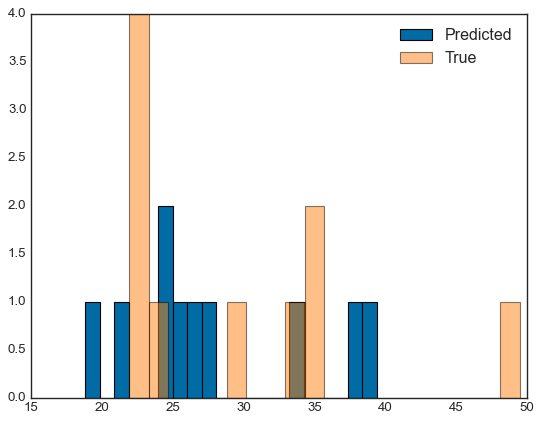

In [825]:
import matplotlib.pyplot as plt

# Get predicted outputs
outputs = model(X_test).detach().numpy()

# Plot histograms of predicted and true outputs
plt.hist(outputs, bins=20, alpha=1, label='Predicted')
plt.hist(y_test.numpy(), bins=20, alpha=0.5, label='True')
plt.legend()
plt.show()

In [830]:
X_train = df.drop(['DRUNK_DRIVING_PERCENTAGE'], axis=1)
y_train = df['DRUNK_DRIVING_PERCENTAGE']

X = small_df.drop(['STATE','STATE_NAME','DRUNK_DRIVING_PERCENTAGE_2'], axis=1)
y = small_df['DRUNK_DRIVING_PERCENTAGE_2']

_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=415)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
error = y_test - y_pred
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

Mean Squared Error: 1643.5564167572763
R-squared score: -21.995868404921193


In [831]:
X_train = df.drop(['DRUNK_DRIVING_PERCENTAGE'], axis=1)
y_train = df['DRUNK_DRIVING_PERCENTAGE']

X = small_df.drop(['STATE','STATE_NAME','DRUNK_DRIVING_PERCENTAGE_2'], axis=1)
y = small_df['DRUNK_DRIVING_PERCENTAGE_2']

_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=415)

model_rf = RandomForestRegressor(n_estimators=300, max_depth = 20, min_samples_split = 2, random_state=123)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random forest MSE:', mse_rf)

Random forest MSE: 147.13747903363793


In [1058]:
X = df.drop(['DRUNK_DRIVING_PERCENTAGE'], axis=1)
y = df['DRUNK_DRIVING_PERCENTAGE']

X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

torch.manual_seed(123)
model = NeuralNet_3()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=3e-4)

for epoch in range(15000):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    with torch.no_grad():
        y_pred = model(X_test)
        test_mse = criterion(y_pred, y_test)
print(test_mse)

tensor(41.9727)


In [1063]:
X = small_df.drop(['STATE','STATE_NAME','DRUNK_DRIVING_PERCENTAGE_2'], axis=1)
y = small_df['DRUNK_DRIVING_PERCENTAGE_2']

X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=415)

trainMSE2 = []
testMSE2 = []
for epoch in range(250):
    optimizer.zero_grad()

    outputs = model(X_train)
    
    loss = criterion(outputs, y_train)
    trainMSE2.append(loss.item())
    loss.backward()
    optimizer.step()
    with torch.no_grad():
        y_pred_test = model(X_test)
        test_mse = criterion(y_pred_test, y_test)
        testMSE2.append(test_mse)
print(loss.item())     

2.3088555335998535


In [1066]:
test_mse

tensor(62.5181)

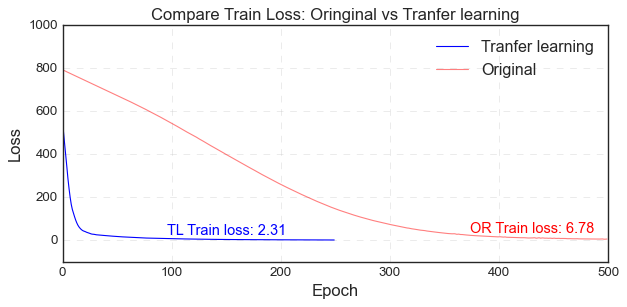

In [1107]:
# Set the figure size
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(trainMSE2, color='blue', linewidth=1, label='Tranfer learning')
ax.plot(losses, color='red', linewidth=1, alpha=0.5, label='Original')
ax.set_ylim(-100, 1000)
ax.set_xlim(0, 500)

# Add labels and title
ax.set_xlabel('Epoch', fontsize=15)
ax.set_ylabel('Loss', fontsize=15)
ax.set_title('Compare Train Loss: Oringinal vs Tranfer learning', fontsize=15)
ax.text(150, 12, 'TL Train loss: 2.31', ha='center', va='bottom', color='blue', fontsize=13)
ax.text(430, 22, 'OR Train loss: 6.78', ha='center', va='bottom', color='red', fontsize=13)
ax.grid(True, linestyle='--', alpha=0.7)

# Add legend
ax.legend()

# Adjust the plot layout
plt.tight_layout()

# Save the plot as an image
plt.savefig('pic/10.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

1000

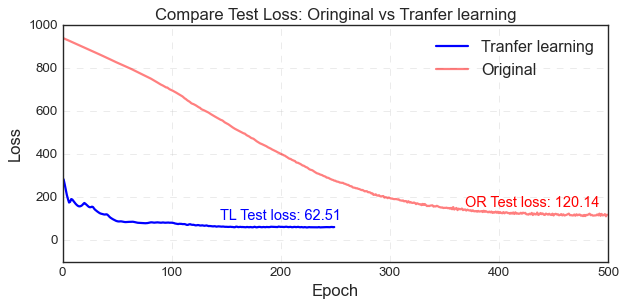

In [1088]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(testMSE2, color='blue', linewidth=2, label='Tranfer learning')
ax.plot(testlosses, color='red', linewidth=2, alpha=0.5, label='Original')
ax.set_ylim(-100, 1000)
ax.set_xlim(0, 500)

# Add labels and title
ax.set_xlabel('Epoch', fontsize=15)
ax.set_ylabel('Loss', fontsize=15)
ax.set_title('Compare Test Loss: Oringinal vs Tranfer learning', fontsize=15)
ax.text(200, 82, 'TL Test loss: 62.51', ha='center', va='bottom', color='blue', fontsize=13)
ax.text(430, 142, 'OR Test loss: 120.14', ha='center', va='bottom', color='red', fontsize=13)

ax.grid(True, linestyle='--', alpha=0.7)

# Add legend
ax.legend()

# Adjust the plot layout
plt.tight_layout()

# Save the plot as an image
plt.savefig('pic/11.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [1101]:
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

small_df['Abb_state'] = small_df['STATE_NAME'].map(state_abbreviations)
small_df['percentage of drunk driving accidents'] = small_df["DRUNK_DRIVING_PERCENTAGE_2"]




In [1102]:
import plotly.express as px 
fig = px.choropleth(small_df, locations='Abb_state', locationmode='USA-states', color='percentage of drunk driving accidents', scope='usa') 
plt.savefig('pic/12.png', dpi=300, bbox_inches='tight')
fig.show()

<Figure size 640x480 with 0 Axes>

In [1098]:
outputs = model(X).detach()

small_df["Absolute Errors"] = np.abs(np.array(outputs).reshape(-1) - np.array(y).reshape(-1))

In [1100]:
fig = px.choropleth(small_df, locations='Abb_state', locationmode='USA-states', color='Absolute Errors', scope='usa')
fig.show()

In [1105]:
sorted_df = small_df.sort_values(by='Absolute Errors', ascending=False)
sorted_df

,STATE,STATE_NAME,POPULATION,POPULATION_DENSITY,RURAL_POPULATION_PERCENTAGE,RURAL_POPULATION_DENSITY,MALE_FEMALE_RATIO,WHITE_ALONE,BLACK_ALONE,AMERICAN_INDIAN_ALASKA_NATIVE_ALONE,...,OBESITY_RATE,SMOKING_RATE,DRUG_OVERDOSE_DEATH_RATE,PRECIPITATION,TOTAL_ACCIDENTS,DRUNK_DRIVING_PERCENTAGE_2,Abb_state,Difference,Absolute Errors,percentage of drunk driving accidents
39,45,South Carolina,5.28,172.62,33.7,56.3,94.1,68.6,27.0,0.5,...,36.1,14.0,34.9,49.24,962,35.097,SC,12.923244,12.923244,35.097
25,30,Montana,1.12,7.59,44.1,3.0,101.2,88.9,0.6,6.7,...,31.8,13.0,15.6,14.92,190,49.480,MT,11.218525,11.218525,49.480
17,22,Louisiana,4.59,107.04,26.8,29.5,95.4,62.8,32.8,0.8,...,38.6,17.0,42.7,59.15,762,29.532,LA,10.482450,10.482450,29.532
26,31,Nebraska,1.97,25.56,26.9,6.4,99.5,88.1,5.2,1.5,...,35.9,12.0,11.3,26.66,217,35.538,NE,9.533747,9.533747,35.538
29,34,New Jersey,9.26,1260.15,5.3,105.5,95.5,71.9,15.1,0.6,...,28.2,10.0,32.1,48.02,547,22.528,NJ,9.383209,9.383209,22.528
43,49,Utah,3.38,40.61,9.4,3.2,101.4,90.6,1.5,1.6,...,30.9,6.0,20.5,15.79,256,21.924,UT,9.018696,9.018696,21.924
48,55,Wisconsin,5.89,108.87,29.9,32.5,99.1,87.0,6.7,1.2,...,33.9,11.0,27.7,33.11,561,33.713,WI,5.274837,5.274837,33.713
3,5,Arkansas,3.01,58.16,43.8,25.1,96.4,79.0,15.7,1.0,...,38.7,18.0,19.1,49.72,585,26.710,AR,4.515001,4.515001,26.710
20,25,Massachusetts,6.98,895.36,8.0,109.2,94.3,80.6,9.0,0.5,...,27.4,9.0,33.9,48.42,327,24.423,MA,4.507568,4.507568,24.423
18,23,Maine,1.34,44.49,61.3,26.7,96.0,94.4,1.7,0.7,...,31.9,13.0,39.7,45.49,151,41.173,ME,3.881496,3.881496,41.173
